In [1]:
import sys
sys.path.append("..")

In [2]:
from db.duckdb.duckdbhelper import DuckDBDatabaseHelper
from pprint import pprint
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
db = DuckDBDatabaseHelper("../meters.db")
db.connect()

Connected to DuckDB database: ../meters.db


In [4]:
# weather_daily_darksky
sql_query =f"SELECT COUNT(1) FROM  weather_daily_darksky"
records = db.fetch_all(sql_query)
print(records)

Fetched 1 rows.
[(882,)]


In [5]:
sql_query =f"SELECT * FROM  weather_daily_darksky LIMIT 5"
records = db.fetch_all(sql_query)
pprint(records)
db.close_connection()

Fetched 5 rows.
[(11.96,
  datetime.datetime(2011, 11, 11, 23, 0),
  123,
  'fog',
  9.4,
  datetime.datetime(2011, 11, 11, 7, 0),
  0.79,
  3.88,
  1016.08,
  datetime.datetime(2011, 11, 11, 7, 0),
  10.87,
  'rain',
  3.3,
  0.95,
  datetime.datetime(2011, 11, 11, 19, 0),
  10.87,
  11.96,
  1.0,
  datetime.datetime(2011, 11, 11, 0, 0),
  datetime.datetime(2011, 11, 11, 16, 19, 21),
  10.87,
  8.85,
  10.87,
  datetime.datetime(2011, 11, 11, 7, 12, 14),
  datetime.datetime(2011, 11, 11, 19, 0),
  datetime.datetime(2011, 11, 11, 11, 0),
  'Foggy until afternoon.',
  datetime.datetime(2011, 11, 11, 19, 0),
  6.48,
  datetime.datetime(2011, 11, 11, 23, 0),
  datetime.datetime(2011, 11, 11, 19, 0),
  0.52),
 (8.59,
  datetime.datetime(2011, 12, 11, 14, 0),
  198,
  'partly-cloudy-day',
  4.49,
  datetime.datetime(2011, 12, 11, 1, 0),
  0.56,
  3.94,
  1007.71,
  datetime.datetime(2011, 12, 11, 2, 0),
  5.62,
  'rain',
  12.09,
  0.88,
  datetime.datetime(2011, 12, 11, 19, 0),
  -0.64,
  

In [6]:
db.connect()
sql_query ="""
SELECT column_name FROM information_schema.columns \
    WHERE table_name='weather_daily_darksky'
    """
records = db.fetch_all(sql_query)
pprint(records)
db.close_connection()

Connected to DuckDB database: ../meters.db
Fetched 32 rows.
[('temperatureMax',),
 ('temperatureMaxTime',),
 ('windBearing',),
 ('icon',),
 ('dewPoint',),
 ('temperatureMinTime',),
 ('cloudCover',),
 ('windSpeed',),
 ('pressure',),
 ('apparentTemperatureMinTime',),
 ('apparentTemperatureHigh',),
 ('precipType',),
 ('visibility',),
 ('humidity',),
 ('apparentTemperatureHighTime',),
 ('apparentTemperatureLow',),
 ('apparentTemperatureMax',),
 ('uvIndex',),
 ('time',),
 ('sunsetTime',),
 ('temperatureLow',),
 ('temperatureMin',),
 ('temperatureHigh',),
 ('sunriseTime',),
 ('temperatureHighTime',),
 ('uvIndexTime',),
 ('summary',),
 ('temperatureLowTime',),
 ('apparentTemperatureMin',),
 ('apparentTemperatureMaxTime',),
 ('apparentTemperatureLowTime',),
 ('moonPhase',)]
Connection closed.


In [7]:
sql_query ="""

SELECT energy_sum, 
temperatureMin, 
temperatureMax,
cloudCover,
windSpeed,
humidity,
windBearing, 
dewPoint,
pressure, 
apparentTemperatureHigh, 
visibility, 
apparentTemperatureLow, 
apparentTemperatureMax, 
uvIndex,
temperatureLow, 
temperatureHigh,
apparentTemperatureMin, 
moonPhase,
FROM  meters m LEFT JOIN info_household ih
ON m.LCLid = ih.LCLid
LEFT JOIN weather_daily_darksky_modified wd
ON m.day = wd.formatted_temperatureMaxTime_weather_daily_darksky

"""

db.connect()
records = db.fetch_all(sql_query)
db.close_connection()

Connected to DuckDB database: ../meters.db
Fetched 3562661 rows.
Connection closed.


In [8]:
pprint(records[0])

(11.087000000000002,
 6.41,
 11.53,
 0.29,
 2.18,
 0.84,
 252,
 6.15,
 1004.92,
 11.53,
 12.94,
 1.64,
 11.53,
 2.0,
 2.81,
 11.53,
 4.01,
 0.92)


In [9]:
df = pd.DataFrame(records,
                   columns = ["energy_sum",
                              "min_temp",
                              "max_temp",
                              "cloudCover",
                              "windSpeed","humidity",
                              "windBearing", "dewPoint",
"pressure", "apparentTemperatureHigh", "visibility", 
"apparentTemperatureLow", "apparentTemperatureMax", "uvIndex",
"temperatureLow", "temperatureHigh",
"apparentTemperatureMin", "moonPhase",])

df_energy = df

In [10]:
def draw_plot(fig_size_x = 15,
              fig_size_y = 10,
              tick_params_labelsize = 14,
             xlabel_name_fontsize = 20,
             ylabel_name_fontsize = 20,
             title_name_fontsize = 20):
    
    #get current figure 
    fig=plt.gcf()
    
    #set the size of the figure
    fig.set_size_inches(fig_size_x,fig_size_y)

    #get axes of the current figure 
    ax =  fig.gca()

    # set the label size of the ticks of the axes
    ax.tick_params(labelsize=tick_params_labelsize)

    # set the label size of the x axis
    ax.set_xlabel(xlabel_name,fontsize = xlabel_name_fontsize)

    # set the label size of the y axis
    ax.set_ylabel(ylabel_name,fontsize = ylabel_name_fontsize)

     # set the title of the plot
    ax.set_title(title_name,fontsize = title_name_fontsize)

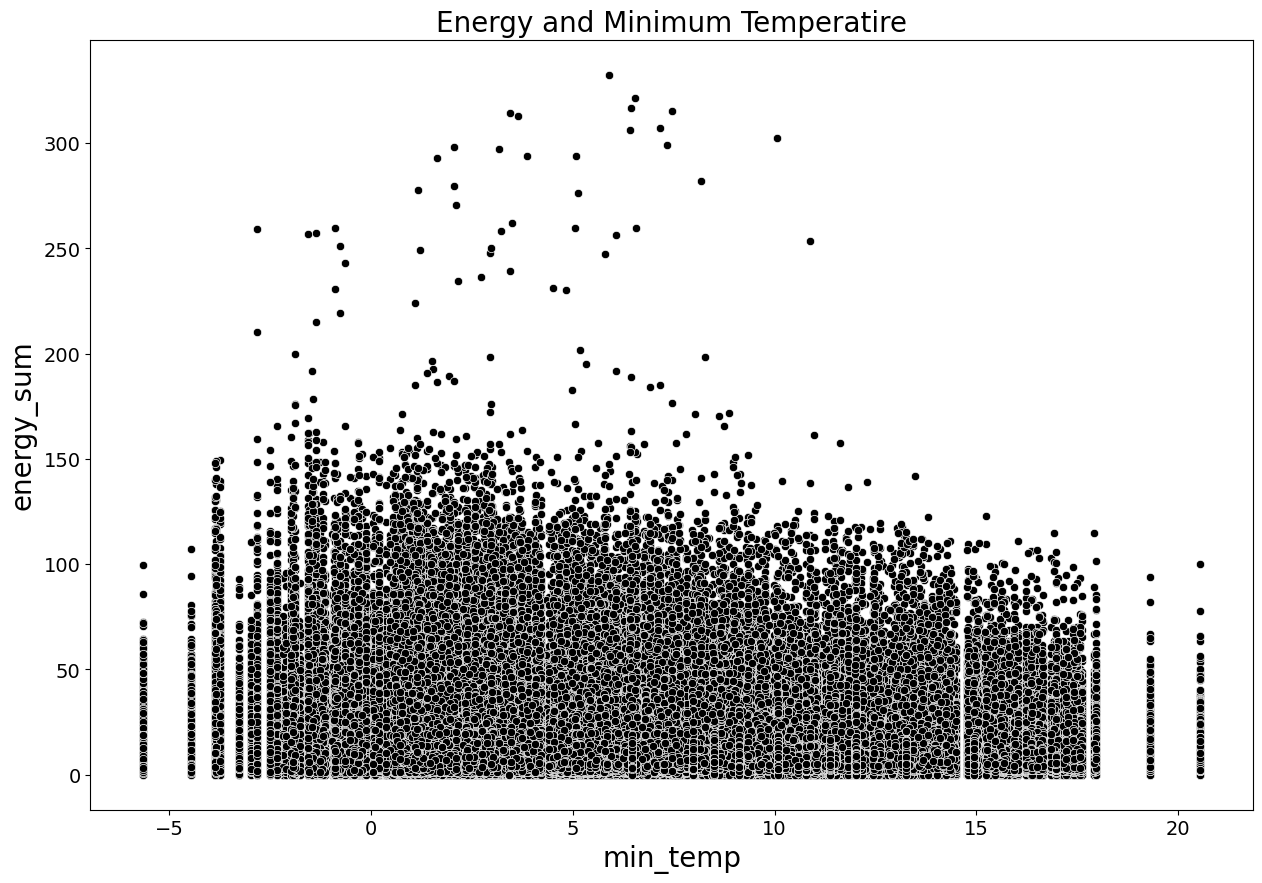

In [11]:
sns.scatterplot( x= 'min_temp', 
                y = 'energy_sum' , 
                color = 'black', 
                data = df)

title_name = "Energy and Minimum Temperatire"
xlabel_name = "min_temp"
ylabel_name = "energy_sum"

draw_plot()

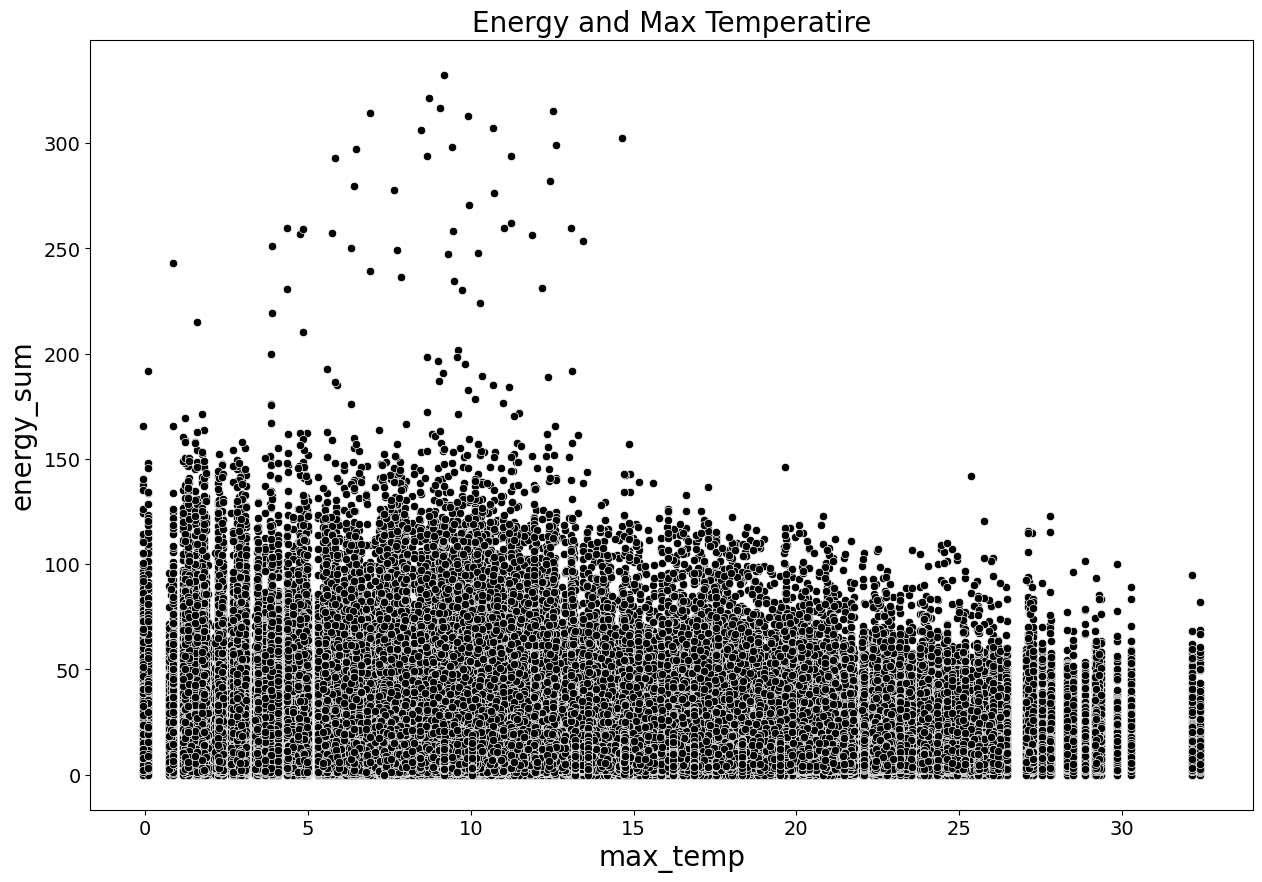

In [12]:
sns.scatterplot( x= 'max_temp', 
                y = 'energy_sum' , 
                color = 'black', 
                data = df)

title_name = "Energy and Max Temperatire"
xlabel_name = "max_temp"
ylabel_name = "energy_sum"

draw_plot()

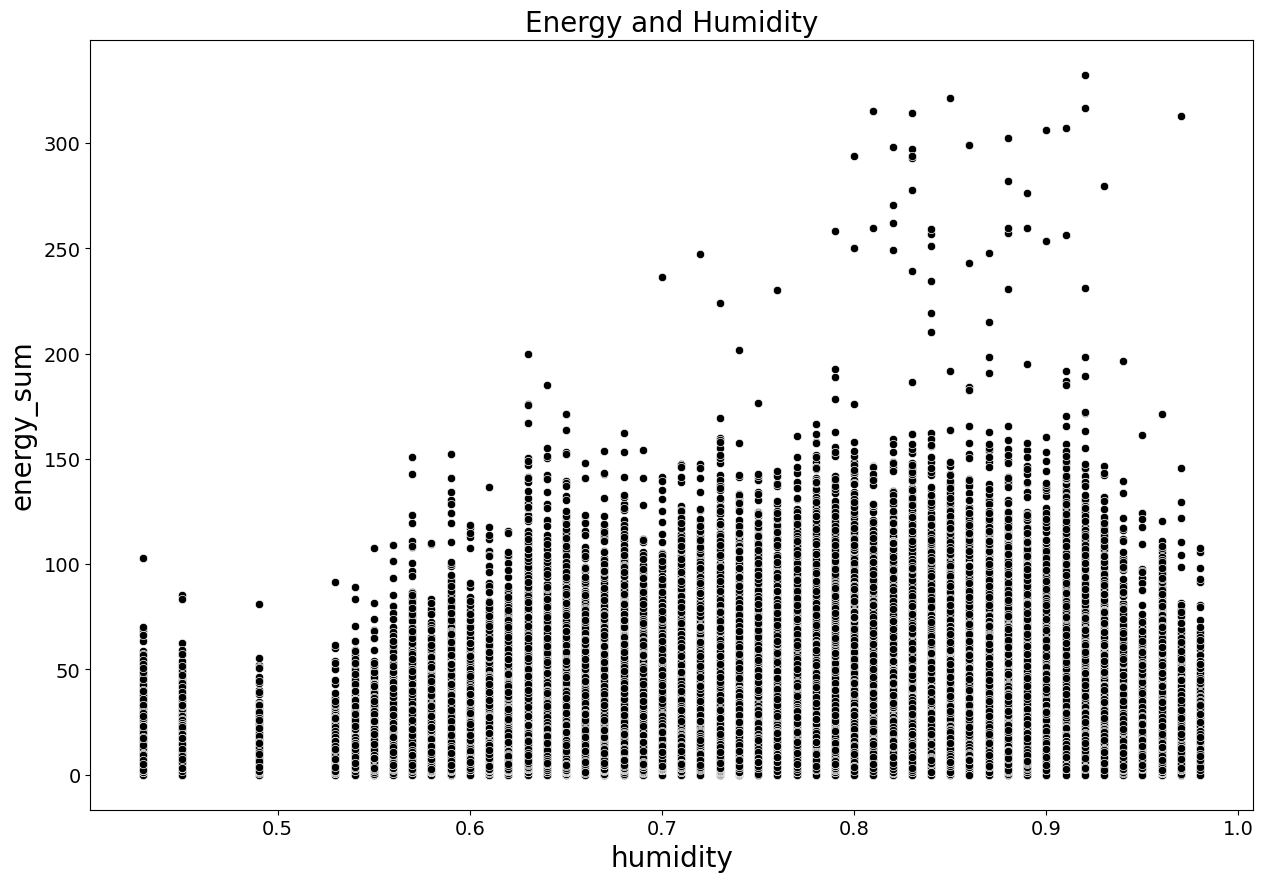

In [13]:
sns.scatterplot( x= 'humidity', 
                y = 'energy_sum' , 
                color = 'black', 
                data = df)

title_name = "Energy and Humidity"
xlabel_name = "humidity"
ylabel_name = "energy_sum"

draw_plot()

In [14]:
correlation_matrix = df.corr()

In [15]:
correlation_matrix.iloc[:,0]

energy_sum                 1.000000
min_temp                  -0.163202
max_temp                  -0.172107
cloudCover                 0.056842
windSpeed                  0.036109
humidity                   0.083510
windBearing               -0.014245
dewPoint                  -0.150245
pressure                  -0.038279
apparentTemperatureHigh   -0.172792
visibility                -0.058802
apparentTemperatureLow    -0.160300
apparentTemperatureMax    -0.172160
uvIndex                   -0.147192
temperatureLow            -0.155477
temperatureHigh           -0.172476
apparentTemperatureMin    -0.167219
moonPhase                 -0.011202
Name: energy_sum, dtype: float64

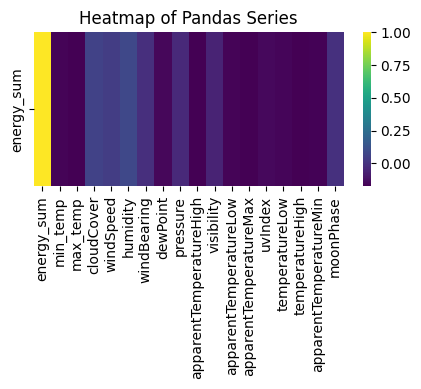

In [16]:
df = correlation_matrix.iloc[:,0].to_frame().T  # Transpose to make it 2D

plt.figure(figsize=(5,2
                    ))
sns.heatmap(df,cmap='viridis')

plt.title('Heatmap of Pandas Series')
plt.show()

In [17]:
df

,energy_sum,min_temp,max_temp,cloudCover,windSpeed,humidity,windBearing,dewPoint,pressure,apparentTemperatureHigh,visibility,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureHigh,apparentTemperatureMin,moonPhase
energy_sum,1.0,-0.163202,-0.172107,0.056842,0.036109,0.08351,-0.014245,-0.150245,-0.038279,-0.172792,-0.058802,-0.1603,-0.17216,-0.147192,-0.155477,-0.172476,-0.167219,-0.011202
